In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [147]:
#Directly train, test data set is given, need to read that.

In [148]:
df1 = pd.read_csv('santander-train.csv')

In [149]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [150]:
df1.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [151]:
df1x = df1.drop('TARGET',axis = 1) 
df1y = df1['TARGET']

In [152]:
df1x.shape, df1y.shape

((76020, 370), (76020,))

In [153]:
df1x.head(5)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [154]:
df1y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [155]:
x_train, x_test, y_train, y_test = train_test_split(df1x, df1y, test_size = 0.2, random_state = 0)

In [156]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60816, 370), (15204, 370), (60816,), (15204,))

# Constant Feature Removal

In [157]:
constant_filter = VarianceThreshold(threshold=0) 

# define the threshold. For constant feature removal, we always set
# threshold as 0

In [158]:
constant_filter.fit(x_train) # fit the constant_filter method to data

VarianceThreshold(threshold=0)

In [159]:
constant_filter.get_support().sum()  

# provides non constant features list. we need to transpose this result to get 
#list of constant features 
# x_train was having 370 columns, in that 332 columns are not constant i.e 38 columns are constant. 

332

In [160]:
constant_list = [not temp for temp in constant_filter.get_support()]  #provides 'True' for constant columns 

In [161]:
constant_list # has value as 'True' for all the columns which are constant. 

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [162]:
type(constant_list)

list

In [163]:
x_train.columns[constant_list].shape

(38,)

In [164]:
x_train.columns[constant_list]  # below are those constant columns.

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
       'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3'],
      dtype='object')

In [165]:
x_train['ind_var2_0'].unique()  #cross test, unique value is 0, so its a constant column

array([0])

In [166]:
x_train['num_reemb_var33_hace3'].unique()

array([0])

In [167]:
#now need to remove these constant columns in train data

x_train_filtered = constant_filter.transform(x_train)
x_test_filtered = constant_filter.transform(x_test)

In [168]:
x_train_filtered.shape, x_test_filtered.shape,x_train.shape # 332 columns means constant features are removed !!!

((60816, 332), (15204, 332), (60816, 370))

In [169]:
# Next step is to remove Quasi constant features from above filtered datasets. 

# Quasi Constant Feature Removal

In [170]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

#there is no hard rule on defining threshould. Need to decide by user based on the requiement
# 0.01 means feature has same constant value for 99.99% of data and only 0.01%of data is different. 
#such common repeating data is not useful for model to do prediction, hence its better to remove them.

In [171]:
quasi_constant_filter.fit(x_train_filtered) #pls note here we are using 'x_train_filtered' dataset

VarianceThreshold(threshold=0.01)

In [172]:
quasi_constant_filter.get_support().sum() # i.e 267 not quasi constant columns are there

267

In [173]:
quasi_constant_list = [not temp for temp in quasi_constant_filter.get_support()]  #provides 'True' for constant columns 

In [174]:
quasi_constant_list # has value as 'True' for all the columns which are constant. 

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,

In [175]:
type(x_train_filtered)

numpy.ndarray

In [176]:
x_train_filtered = pd.DataFrame(x_train_filtered) 

#x_train_filtered was array, inorder to see the quasi constant 
#columns list need to convert x_train_filtered into dataframe. If no need to see those column list there no need
# to convert as DF, we can proceed to apply transform. 

In [177]:
type(x_train_filtered)

pandas.core.frame.DataFrame

In [178]:
x_train_filtered.shape

(60816, 332)

In [179]:
len(quasi_constant_list)

332

In [180]:
quasi_constant_list.count(True)

65

In [181]:
quasi_constant_list.count(False)

267

In [182]:
x_train_filtered.columns[quasi_constant_list].shape

(65,)

In [183]:
x_train_filtered.columns[quasi_constant_list]  

# below are those quasi constant columns.
# hmmm another challenge, when we convert array to dataframe we need to give column list also
# not sure how to give some many column list. Need to explore later. For now have posted this query in
# that youtube video by KGP Talkie.

Int64Index([ 21,  24,  25,  33,  34,  35,  36,  39,  40,  41,  42,  43,  44,
             45,  46,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,  66,
             67,  73,  75,  76,  77,  83,  84,  94,  95, 101, 102, 123, 124,
            132, 133, 134, 179, 190, 224, 225, 237, 238, 239, 241, 255, 256,
            257, 258, 260, 273, 274, 275, 280, 281, 282, 283, 284, 285, 286],
           dtype='int64')

In [184]:
x_train_filtered.head()

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
0,79893.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130119.36
1,57172.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247015.23
2,73431.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106671.21
3,92487.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90184.86
4,135017.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63649.02


In [185]:
x_train_filtered.iloc[21].value_counts() #most of the rows(i.e 317) is 0

0.00         317
3.00           5
1.00           4
2.00           2
236446.02      1
118416.00      1
99.00          1
39.00          1
Name: 21, dtype: int64

In [186]:
x_train_filtered.iloc[24].value_counts() 

0.000000         302
3.000000          11
1.000000           7
90.000000          5
2.000000           2
72.600000          1
117310.979016      1
84.210000          1
92806.000000       1
23.000000          1
Name: 24, dtype: int64

In [187]:
x_train_filtered.iloc[285].value_counts()

0.00         282
3.00          11
1.00          10
6.00           6
2.00           5
12.00          4
24000.00       3
9.00           2
72.00          1
24012.00       1
333893.28      1
5.19           1
17806.47       1
20903.25       1
122525.00      1
9.72           1
18.00          1
Name: 285, dtype: int64

In [188]:
#now need to remove these constant columns in train data

x_train_quasi_filtered = quasi_constant_filter.transform(x_train_filtered)
x_test_quasi_filtered = quasi_constant_filter.transform(x_test_filtered)

In [189]:
x_train_filtered.shape,x_train_quasi_filtered.shape  # 267 columns are retained

((60816, 332), (60816, 267))

In [190]:
x_test_filtered.shape,x_test_quasi_filtered.shape # 267 columns are retained

((15204, 332), (15204, 267))

In [191]:
# Next step is to remove Duplicate features

# Remove Duplicate Features

In [192]:
#As there is no direct library or method to remove the duplicated columns,we need to transpose the data and find the 
#duplicated rows and then remove it. Later re-transpose back again. 

#This method keeps one columns and removes another exact duplicated column. (so the whole as a feature is not lost)

In [193]:
x_train_t = x_train_quasi_filtered.T
x_test_t = x_test_quasi_filtered.T

In [194]:
#convert array to DF

x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [195]:
x_train_t.shape, x_test_t.shape # we can see that rows has become columns and vice versa. 

((267, 60816), (267, 15204))

In [196]:
#lets find duplicated rows. This will take some time to execute.

x_train_t.duplicated().sum()

16

In [197]:
duplicated_features = x_train_t.duplicated()

duplicated_features  # it will TRUE for duplicated row.

0      False
1      False
2      False
3      False
4      False
       ...  
262    False
263    False
264    False
265    False
266    False
Length: 267, dtype: bool

In [198]:
features_to_keep = [not temp for temp in duplicated_features]

In [199]:
features_to_keep # features that are not duplicated. 

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru

In [200]:
x_train_unique = x_train_t[features_to_keep].T
x_test_unique = x_test_t[features_to_keep].T

In [201]:
x_train_quasi_filtered.shape,x_train_unique.shape #16 duplicated columns are removed

((60816, 267), (60816, 251))

In [202]:
x_test_quasi_filtered.shape,x_test_unique.shape #16 duplicated columns are removed

((15204, 267), (15204, 251))

In [203]:
# Initial dataset had 371 features, after 3 types of dups/constan removal we are left with 251 features. 

# Build the model and compare the performance of selected feature 

In [204]:
# Define the function to invoke RF and print accuracy

def run_randomforest(x_trains, x_tests, y_trains, y_tests):
    clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1)
    clf.fit(x_trains,y_trains)
    y_pred = clf.predict(x_tests)
    print("Accuracy of Test Set : ")
    print(accuracy_score(y_tests,y_pred))


In [205]:
# pass raw dataset

%time  # to get model execution time
run_randomforest(x_train, x_test, y_train, y_test) 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs
Accuracy of Test Set : 
0.9570507761115495


In [206]:
# pass refined train dataset 

%time  # to get model execution time
run_randomforest(x_train_unique, x_test_unique, y_train, y_test)  

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Accuracy of Test Set : 
0.9565903709550119


In [207]:
# in the youtube video the accuracy from refined dataset was more than raw dataset. Also the execution time was 
# optimized. In my case it's reverse, raw dat gave better accuray than refined dataset. 

#not sure why, but understood the process atleast. 

# Correlated Feature Removal

In [210]:
'''
Multicollinearity refers to a situation in which two or more features are highly linearly related i.e to say
if col1 and col2 are highly correlated then using either of the column target can be predicted. There is no much
value add or information gain by keeping both the columns. In these situations its better to remove one column. 

When many such collinear features present, the model predictions goes down. Hence need to avoid multicollinearity.


Feature Space (i.e input features) to target correlation is desired
Feature to feature correlation is not desired
If 2 features are highly correlated then either feature is redundant
Correlation in feature space increases model complexity
Removing correlated features improves model performance
Different model shows different performance over the correlated features
'''

'\nMulticollinearity refers to a situation in which two or more features are highly linearly related i.e to say\nif col1 and col2 are highly correlated then using either of the column target can be predicted. There is no much\nvalue add or information gain by keeping both the columns. In these situations its better to remove one column. \n\nWhen many such collinear features present, the model predictions goes down. Hence need to avoid multicollinearity.\n\n\nFeature Space (i.e input features) to target correlation is desired\nFeature to feature correlation is not desired\nIf 2 features are highly correlated then either feature is redundant\nCorrelation in feature space increases model complexity\nRemoving correlated features improves model performance\nDifferent model shows different performance over the correlated features\n'

In [211]:
corrmat = x_train_unique.corr()  # (default to pearson)
corrmat 

#for each of the column corelation value is calculated.
# The corr() function takes a parameter called method, which allows us to specify the type of correlation. 
#By default it is the pearson correlation, but it can also be specified as kendall or spearman.

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,1.000000,-0.003355,-0.003030,-0.002841,-0.000182,-0.002588,-0.007595,-0.007029,-0.007912,-0.007852,...,-0.008510,0.007144,0.007229,0.004687,0.004963,-0.003063,0.000216,-0.000161,0.001324,-0.000806
1,-0.003355,1.000000,-0.003084,0.001741,0.005201,0.006165,0.001469,0.001652,0.000509,0.000607,...,0.000250,0.000698,0.000527,0.000699,0.000734,0.000610,0.000464,0.000728,0.000764,0.000086
2,-0.003030,-0.003084,1.000000,0.041471,0.096276,0.102345,0.041124,0.047016,0.008269,0.009404,...,0.012898,0.027392,0.019040,0.028012,0.028828,0.030518,0.019340,0.033365,0.033855,0.007068
3,-0.002841,0.001741,0.041471,1.000000,0.042038,0.035122,0.011186,0.011467,0.000543,0.002694,...,0.008071,-0.000815,-0.000679,-0.000410,-0.000386,0.002938,-0.000617,0.005650,0.007349,-0.000476
4,-0.000182,0.005201,0.096276,0.042038,1.000000,0.887231,0.358368,0.312597,0.034486,0.059867,...,0.001245,0.021807,0.017736,0.018021,0.019888,0.010000,0.007515,0.012358,0.011676,0.013057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.003063,0.000610,0.030518,0.002938,0.010000,0.008664,-0.000426,-0.000555,-0.000209,-0.000249,...,0.003731,-0.000270,-0.000204,-0.000273,-0.000285,1.000000,0.331816,0.821024,0.712661,0.002935
263,0.000216,0.000464,0.019340,-0.000617,0.007515,0.006326,-0.000443,-0.000493,-0.000155,-0.000185,...,-0.000077,-0.000200,-0.000152,-0.000202,-0.000212,0.331816,1.000000,0.239685,0.217884,0.001634
264,-0.000161,0.000728,0.033365,0.005650,0.012358,0.011184,-0.000221,-0.000480,-0.000251,-0.000299,...,0.011086,-0.000323,-0.000245,-0.000326,-0.000341,0.821024,0.239685,1.000000,0.968391,0.003590
265,0.001324,0.000764,0.033855,0.007349,0.011676,0.010515,-0.000340,-0.000573,-0.000263,-0.000314,...,0.009181,-0.000339,-0.000257,-0.000343,-0.000358,0.712661,0.217884,0.968391,1.000000,0.003259


In [212]:
corrmat.shape

(251, 251)

In [213]:
corrmat.columns

#shape shows as 251 columns, which is correct because in x_train_unique we have 251 columns.
#but when we see the result or columns list it shows as 266, not sure if some number is jumped in between
#but length still shows as 251. Need to understand later. 

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            257, 258, 259, 260, 261, 262, 263, 264, 265, 266],
           dtype='int64', length=251)

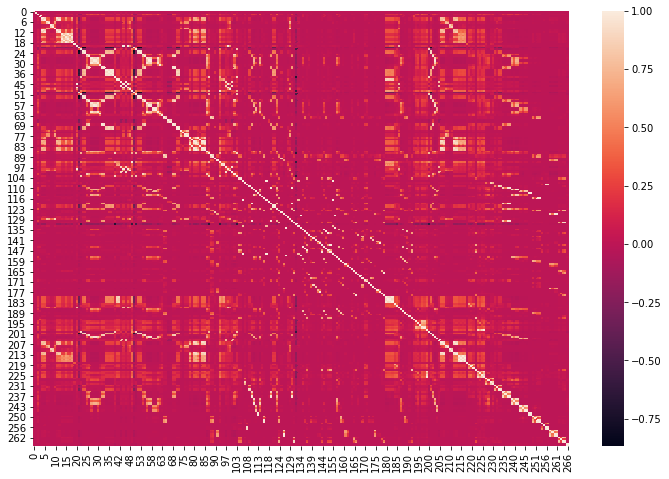

In [214]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat)

In [215]:
 def get_correlation(data, threshold):
        corr_col = set() #to avoid dups , set is defined.
        corrmat = data.corr()
        for i in range(len(corrmat.columns)):
            for j in range(i):        # this is to traverse like (0,0)(0,1)...(0,256)
                if abs(corrmat.iloc[i,j])>threshold:  #abs is to consider both +ve and -ve threshold. 
                    colname = corrmat.columns[i]
                    corr_col.add(colname)
        return corr_col
    

In [216]:
corr_features = get_correlation(x_train_unique,0.85)  # threshold is user defined. 
corr_features

{5,
 7,
 9,
 11,
 12,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 42,
 45,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 77,
 81,
 82,
 83,
 84,
 85,
 87,
 88,
 89,
 93,
 95,
 97,
 98,
 99,
 100,
 102,
 103,
 105,
 114,
 117,
 119,
 121,
 125,
 129,
 130,
 134,
 145,
 146,
 147,
 154,
 155,
 156,
 173,
 177,
 179,
 180,
 181,
 182,
 183,
 198,
 200,
 201,
 202,
 203,
 206,
 207,
 209,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 223,
 225,
 226,
 229,
 230,
 233,
 234,
 235,
 237,
 238,
 239,
 241,
 242,
 245,
 246,
 247,
 249,
 252,
 253,
 256,
 257,
 258,
 260,
 261,
 264,
 265}

In [217]:
len(corr_features) 

# so 121 features are highly correlated i.e above 85% 

121

In [218]:
x_train_uncorr = x_train_unique.drop(labels = corr_features, axis = 1)
x_test_uncorr = x_test_unique.drop(labels = corr_features, axis = 1)

In [219]:
x_train_unique.shape, x_train_uncorr.shape  # we can see that 121 columns are removed. 

((60816, 251), (60816, 130))

In [220]:
x_test_unique.shape, x_test_uncorr.shape

((15204, 251), (15204, 130))

In [221]:
# Let’s find out the accuracy and training time of the uncorrelated dataset.

%time  # to get model execution time
run_randomforest(x_train_uncorr, x_test_uncorr, y_train, y_test) 

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs
Accuracy of Test Set : 
0.9565903709550119


In [222]:
#No change in accuracy, good that it didn;t reduce atleast. But Wall time got increased. 
# Actually we removed some of the features, either accuracy or time or both was supposed to do little better
# but its doing more bad for me. Hmmmm not sure, is it because now model is feeling difficult to predict with less
# features space....may be the case.....

In [223]:
corrmat1 = x_train_uncorr.corr()
corrmat1 

,0,1,2,3,4,6,8,10,13,14,...,243,244,250,251,254,255,259,262,263,266
0,1.000000,-0.003355,-0.003030,-0.002841,-0.000182,-0.007595,-0.007912,-0.008475,0.000063,-0.001817,...,0.005660,0.002798,0.006218,-0.000693,-0.006205,0.000163,0.007229,-0.003063,0.000216,-0.000806
1,-0.003355,1.000000,-0.003084,0.001741,0.005201,0.001469,0.000509,0.001267,0.002879,0.003313,...,0.002264,0.001348,0.000736,0.000376,0.000182,0.000156,0.000527,0.000610,0.000464,0.000086
2,-0.003030,-0.003084,1.000000,0.041471,0.096276,0.041124,0.008269,0.034383,0.084952,0.073854,...,0.118949,0.070926,0.046927,0.024240,0.006832,-0.003201,0.019040,0.030518,0.019340,0.007068
3,-0.002841,0.001741,0.041471,1.000000,0.042038,0.011186,0.000543,0.013159,0.022491,0.015570,...,-0.002801,-0.001564,-0.000963,-0.000494,-0.000250,-0.000213,-0.000679,0.002938,-0.000617,-0.000476
4,-0.000182,0.005201,0.096276,0.042038,1.000000,0.358368,0.034486,0.260458,0.284913,0.251756,...,-0.004432,0.000246,0.008031,-0.000149,-0.001019,-0.000868,0.017736,0.010000,0.007515,0.013057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.000163,0.000156,-0.003201,-0.000213,-0.000868,-0.000153,-0.000054,-0.000133,-0.000505,-0.000461,...,-0.000238,-0.000139,-0.000076,-0.000038,0.012179,1.000000,-0.000052,-0.000064,-0.000048,-0.001364
259,0.007229,0.000527,0.019040,-0.000679,0.017736,0.009761,-0.000171,-0.000423,0.001755,0.010839,...,-0.000757,-0.000444,-0.000242,-0.000121,-0.000061,-0.000052,1.000000,-0.000204,-0.000152,0.001454
262,-0.003063,0.000610,0.030518,0.002938,0.010000,-0.000426,-0.000209,-0.000382,0.048858,0.039553,...,-0.000911,-0.000524,0.028646,-0.000149,0.009427,-0.000064,-0.000204,1.000000,0.331816,0.002935
263,0.000216,0.000464,0.019340,-0.000617,0.007515,-0.000443,-0.000155,-0.000384,0.023185,0.018556,...,-0.000688,-0.000404,0.015999,-0.000110,-0.000056,-0.000048,-0.000152,0.331816,1.000000,0.001634


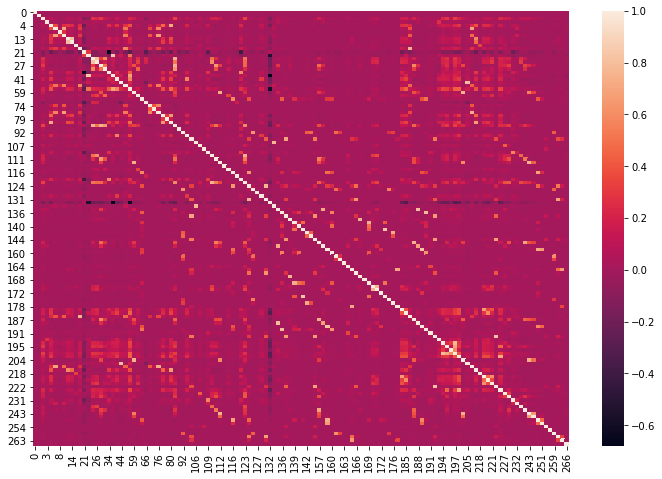

In [224]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat1)

# we can see that the more white (+ve correlated columns) and black (-ve correlated columns) spots are reduced. 

In [225]:
# Above actually we removed all the highly correlated columns,but thats not a good idea since we are loosing lot of 
#info. Here model accuracy didnt get impacted much but there can be cases it will impact heavily also. 
# So we need to group these correlated features and select an important feature from each group so that lot of info
# is not lost.

# Feature Grouping and Feature Importance 

In [226]:
corrmat

,0,1,2,3,4,5,6,7,8,9,...,257,258,259,260,261,262,263,264,265,266
0,1.000000,-0.003355,-0.003030,-0.002841,-0.000182,-0.002588,-0.007595,-0.007029,-0.007912,-0.007852,...,-0.008510,0.007144,0.007229,0.004687,0.004963,-0.003063,0.000216,-0.000161,0.001324,-0.000806
1,-0.003355,1.000000,-0.003084,0.001741,0.005201,0.006165,0.001469,0.001652,0.000509,0.000607,...,0.000250,0.000698,0.000527,0.000699,0.000734,0.000610,0.000464,0.000728,0.000764,0.000086
2,-0.003030,-0.003084,1.000000,0.041471,0.096276,0.102345,0.041124,0.047016,0.008269,0.009404,...,0.012898,0.027392,0.019040,0.028012,0.028828,0.030518,0.019340,0.033365,0.033855,0.007068
3,-0.002841,0.001741,0.041471,1.000000,0.042038,0.035122,0.011186,0.011467,0.000543,0.002694,...,0.008071,-0.000815,-0.000679,-0.000410,-0.000386,0.002938,-0.000617,0.005650,0.007349,-0.000476
4,-0.000182,0.005201,0.096276,0.042038,1.000000,0.887231,0.358368,0.312597,0.034486,0.059867,...,0.001245,0.021807,0.017736,0.018021,0.019888,0.010000,0.007515,0.012358,0.011676,0.013057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,-0.003063,0.000610,0.030518,0.002938,0.010000,0.008664,-0.000426,-0.000555,-0.000209,-0.000249,...,0.003731,-0.000270,-0.000204,-0.000273,-0.000285,1.000000,0.331816,0.821024,0.712661,0.002935
263,0.000216,0.000464,0.019340,-0.000617,0.007515,0.006326,-0.000443,-0.000493,-0.000155,-0.000185,...,-0.000077,-0.000200,-0.000152,-0.000202,-0.000212,0.331816,1.000000,0.239685,0.217884,0.001634
264,-0.000161,0.000728,0.033365,0.005650,0.012358,0.011184,-0.000221,-0.000480,-0.000251,-0.000299,...,0.011086,-0.000323,-0.000245,-0.000326,-0.000341,0.821024,0.239685,1.000000,0.968391,0.003590
265,0.001324,0.000764,0.033855,0.007349,0.011676,0.010515,-0.000340,-0.000573,-0.000263,-0.000314,...,0.009181,-0.000339,-0.000257,-0.000343,-0.000358,0.712661,0.217884,0.968391,1.000000,0.003259


In [227]:
corrdata = corrmat.abs().stack() #converted above data into stack. 
corrdata

0    0      1.000000
     1      0.003355
     2      0.003030
     3      0.002841
     4      0.000182
              ...   
266  262    0.002935
     263    0.001634
     264    0.003590
     265    0.003259
     266    1.000000
Length: 63001, dtype: float64

In [228]:
# Let’s arrange the correlated data in the descending order.

corrdata = corrdata.sort_values(ascending=False) 
corrdata

53   24     1.000000e+00
24   53     1.000000e+00
247  249    1.000000e+00
249  247    1.000000e+00
134  156    1.000000e+00
                ...     
120  176    4.178057e-07
146  265    1.781911e-07
265  146    1.781911e-07
136  265    1.781911e-07
265  136    1.781911e-07
Length: 63001, dtype: float64

In [229]:
# Let’s get the correlated data between 1 and 0.85.

corrdata = corrdata[corrdata>0.85]
#corrdata = corrdata[corrdata<1] # among above we need to remove those which are exactly 1 hence criteria is < 1. 

In [230]:
corrdata.shape

(727,)

In [231]:
corrdata = corrdata[corrdata<1] # among above we need to remove those which are exactly 1 hence criteria is < 1. 

In [232]:
corrdata.shape # 727 got reduced to 466

(466,)

In [233]:
corrdata 

#here some are showing correlation as 1 but its not exactly equal to 1. It's showing like that due to notepad
#setting. 

147  137    1.000000
137  147    1.000000
145  135    1.000000
135  145    1.000000
249  113    1.000000
              ...   
213  80     0.852486
125  90     0.852312
90   125    0.852312
180  41     0.850449
41   180    0.850449
Length: 466, dtype: float64

In [234]:
type(corrdata)

pandas.core.series.Series

In [235]:
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata

,level_0,level_1,0
0,147,137,1.000000
1,137,147,1.000000
2,145,135,1.000000
3,135,145,1.000000
4,249,113,1.000000
...,...,...,...
461,213,80,0.852486
462,125,90,0.852312
463,90,125,0.852312
464,180,41,0.850449


In [236]:
# Lets provide proper column names. 

corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,147,137,1.000000
1,137,147,1.000000
2,145,135,1.000000
3,135,145,1.000000
4,249,113,1.000000
...,...,...,...
461,213,80,0.852486
462,125,90,0.852312
463,90,125,0.852312
464,180,41,0.850449


In [237]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [238]:
len(correlated_groups_list)

61

In [239]:
x_train.shape, x_train_uncorr.shape

((60816, 370), (60816, 130))

In [240]:
for group in correlated_groups_list:
    print(group)
    

#below we can see for every value of feature1, various values of feature2 is grouped together. 
# above for loop was written for this purpose only. Need to understand that for loop later. 
# now importance of each combination in each group is identified and then one combination from each group will be 
#selected. 

   features1  features2  corr_value
0        147        137         1.0
   features1  features2  corr_value
2        145        135         1.0
   features1  features2  corr_value
4        249        113         1.0
   features1  features2  corr_value
6        134        127         1.0
   features1  features2  corr_value
9        156        127         1.0
    features1  features2  corr_value
11        247        113         1.0
    features1  features2  corr_value
12        177        143         1.0
    features1  features2  corr_value
14        117        106    0.999880
16        117        155    0.999805
     features1  features2  corr_value
18          23         52    0.999742
216         23         53    0.931268
219         23         24    0.931268
404         23        201    0.867854
421         23         21    0.865380
     features1  features2  corr_value
22          29         58    0.999590
95          29         28    0.981760
116         29         57    0.976661
1

# Feature Importance based on tree based classifiers

In [241]:
# Let’s get the list of important features from the following code.

In [242]:
important_features = []

for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(x_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1)
    importance.columns = ['features', 'importance']
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [243]:
important_features

[features      137.000000
 importance      0.551411
 Name: 1, dtype: float64,
 features      135.000000
 importance      0.513098
 Name: 1, dtype: float64,
 features      113.000000
 importance      0.610169
 Name: 1, dtype: float64,
 features      127.000000
 importance      0.517241
 Name: 1, dtype: float64,
 features      127.000000
 importance      0.517241
 Name: 1, dtype: float64,
 features      113.000000
 importance      0.610169
 Name: 1, dtype: float64,
 features      143.000000
 importance      0.550725
 Name: 1, dtype: float64,
 features      106.000000
 importance      0.998241
 Name: 1, dtype: float64,
 features      52.000000
 importance     0.288285
 Name: 1, dtype: float64,
 features      27.000000
 importance     0.300699
 Name: 6, dtype: float64,
 features      202.00000
 importance      0.39606
 Name: 6, dtype: float64,
 features      98.000000
 importance     0.541274
 Name: 0, dtype: float64,
 features      17.000000
 importance     0.509408
 Name: 1, dtype: float

In [244]:
important_features = pd.DataFrame(important_features) #convert into DF

In [245]:
important_features

,features,importance
1,137.0,0.551411
1,135.0,0.513098
1,113.0,0.610169
1,127.0,0.517241
1,127.0,0.517241
...,...,...
1,8.0,0.652687
1,7.0,0.577731
0,230.0,0.542106
1,229.0,0.545270


In [246]:
important_features.reset_index(inplace=True, drop = True)
important_features # for every group, one important combination is maintained.

,features,importance
0,137.0,0.551411
1,135.0,0.513098
2,113.0,0.610169
3,127.0,0.517241
4,127.0,0.517241
...,...,...
56,8.0,0.652687
57,7.0,0.577731
58,230.0,0.542106
59,229.0,0.545270


In [247]:
# Let’s get the features which are to be discarded.

features_to_consider = set(important_features['features'])
features_to_discard = set(corr_features) - set(features_to_consider)
features_to_discard = list(features_to_discard)

x_train_grouped_uncorr = x_train_unique.drop(labels = features_to_discard, axis = 1)
x_test_grouped_uncorr = x_test_unique.drop(labels=features_to_discard, axis = 1)

In [248]:
x_train_unique.shape, x_train_uncorr.shape, x_train_grouped_uncorr.shape 

# we can see that earlier we dropped many and kept only 130 columns, but now we are keeping 165, not all correlated
# columns are simply dropped. Important correlated columns are maintained.

((60816, 251), (60816, 130), (60816, 165))

In [249]:
x_test_unique.shape, x_test_uncorr.shape, x_test_grouped_uncorr.shape 

((15204, 251), (15204, 130), (15204, 165))

In [251]:
# Lets check the accuracy and time


%time
run_randomforest(x_train_grouped_uncorr, x_test_grouped_uncorr, y_train, y_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
Accuracy of Test Set : 
0.9565903709550119


In [255]:
%time
run_randomforest(x_train, x_test, y_train, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
Accuracy of Test Set : 
0.9570507761115495


In [ ]:
#no change in time, accuracy also good in orginal train data only. 
#not sure why its like this for me. 
# So learning here is, in company also its better to implement simple version of model first and then followed by
# these type of tuning. 